<h1>
Bag of words pipeline
</h1>
<h4>
This notebook goes over the establishment of a 'bag-of-words' (BoW) import pipeline on several news articles
</h4>

In [1]:
#General import statements
import os
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


<h2>
To start, we can define a few sample "documents" to investiage the document vectorization protocols
</h2>

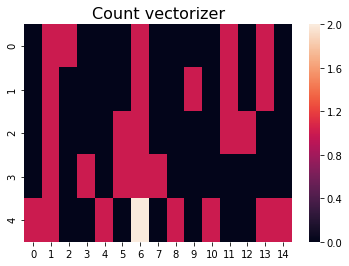

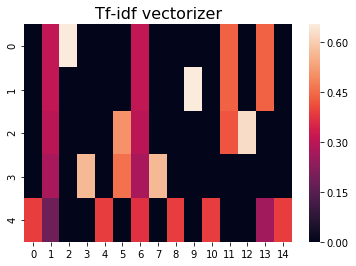

In [11]:
Article_1 = "This is the first article"
Article_2 = "This is the second article"
Article_3 = "The third article is here"
Article_4 = "Fourth article here is it"
Article_5 = "This is a gibberish sentence which is not an article"

Corpus = [Article_1,Article_2,Article_3,Article_4,Article_5]

#These are two different vectorization schemes from the sklearn docs, here we initialize them as objects
CountVec = CountVectorizer()
TfidfVec = TfidfVectorizer()

#Fit the vectorizations to the document corpus
CountMatrix = CountVec.fit_transform(Corpus)
TfidfMatrix = TfidfVec.fit_transform(Corpus)

#The matrix vectorization data is stored in a sparse-matrix format, so we need to convert it back
#to a dense format
CountDense = scipy.sparse.csr_matrix.todense(CountMatrix)
TfidfDense = scipy.sparse.csr_matrix.todense(TfidfMatrix)

sns.heatmap(CountDense)
plt.title("Count vectorizer",fontsize=16)
plt.show()
plt.close()

sns.heatmap(TfidfDense)
plt.title("Tf-idf vectorizer",fontsize=16)
plt.show()
plt.close()

<h2>
So, the two vectorizers work differently (obviously), the Tf-idf vectorizer appears to impose a larger variation amongst the different words.  Now we can look at what words are getting the most weight in each case.
</h2>

In [24]:
#This finds the matrix indices corresponding to the largest elements
#for the COunt vectorizer and Tf-idf vectorizer
CountIndex = np.unravel_index(CountDense.argmax(), CountMatrix.shape)
TfidfIndex = np.unravel_index(TfidfDense.argmax(), TfidfMatrix.shape)



[array([u'this', u'is', u'the', u'first', u'article'], dtype='<U9'),
 array([u'this', u'is', u'the', u'article', u'second'], dtype='<U9'),
 array([u'is', u'the', u'article', u'third', u'here'], dtype='<U9'),
 array([u'is', u'article', u'here', u'fourth', u'it'], dtype='<U9'),
 array([u'this', u'is', u'article', u'gibberish', u'sentence', u'which',
        u'not', u'an'], dtype='<U9')]

<h2>
 For a more realistic example, we define a function to read in the real   
</h2>

In [7]:
def ReadArticle(Path,Filename):
    
    CompleteName = os.path.join(Path,Filename)
    file1 = open(CompleteName,'r')
    Content = file1.readlines()
    file1.close()
    
    return Content

#Path and filenames are 'test articles' from the archive on quillette.com
ReadPath = "TestArticles/"

ReadName_1 = "Article_1.txt"
ReadName_2 = "Article_2.txt"
ReadName_3 = "Article_3.txt"
ReadName_4 = "Article_4.txt"

#Each content variable contains a list of strings, each containing a paragraph of the article
Content_1 = ReadArticle(ReadPath,ReadName_1)
Content_2 = ReadArticle(ReadPath,ReadName_2)
Content_3 = ReadArticle(ReadPath,ReadName_3)
Content_4 = ReadArticle(ReadPath,ReadName_4)


<h2>
Now we define a function to split the articles into individual words and remove punctuation and stop words
</h2>

In [9]:
def SplitArticle(Content):
        SplitContent = []
        
        for index in range(len(Content)):
            Parsed = Content[index].split()                               #Split each paragraph into the individual words
            for indexInner in range(len(Parsed)):
                SplitContent.append(Parsed[indexInner].replace(".",""))   #Append each word to the SplitContent array and remove any periods
                
        return SplitContent
    
SplitContent_1 = SplitArticle(Content_1)
SplitContent_2 = SplitArticle(Content_2)
SplitContent_3 = SplitArticle(Content_3)
SplitContent_4 = SplitArticle(Content_4)

<h2>
Next, we need to do some data cleaning, namely we want to remove stop words, and apply a linguistic stemmer to reduce semantic overlap
</h2>